Fetching dataset from kaggle

In [ ]:
import os

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jessicali9530/kuc-hackathon-winter-2018
! unzip /content/kuc-hackathon-winter-2018.zip
os.remove('/content/kuc-hackathon-winter-2018.zip')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 79% 32.0M/40.7M [00:00<00:00, 178MB/s] 
100% 40.7M/40.7M [00:00<00:00, 184MB/s]
Archive:  /content/kuc-hackathon-winter-2018.zip
  inflating: drugsComTest_raw.csv    
  inflating: drugsComTrain_raw.csv   


Reading the dataset as pandas dataframe

In [ ]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("drugsComTrain_raw.csv")
test_df = pd.read_csv("drugsComTest_raw.csv")

train_df.sample(10)

# Convert date to numerical and see correlation
# See correlation of all other featurers
# Data cleaning aps

# Review length and rating correlation
# Feature weights check

# Graphically hyperparameter tuning
# Focus on pipelining

,uniqueID,drugName,condition,review,rating,date,usefulCount
130653,198269,Exenatide,"Diabetes, Type 2","""I have been using Bydureon for about 3 1/2 mo...",2,6-Jun-16,15
105579,113089,Bisacodyl,Constipation,"""i take this every other month when i get cons...",2,30-Jul-16,7
52018,10317,Sotalol,Atrial Fibrillation,"""In one week I went from a heart rate of 98 to...",1,30-Nov-15,21
34951,116729,Lamictal,Bipolar Disorde,"""My daughter took lamictal for bipolar 1 condi...",1,29-Sep-16,31
51108,29910,Tenofovir,Hepatitis B,"""I am doing great with this medicine. I have n...",9,18-Jan-10,90
3741,122332,Dymista,Allergic Rhinitis,"""This nasal spray has changed my life. I have ...",10,3-Apr-17,11
130113,181261,Prozac,Anxiety and Stress,"""I have spent a lot of time reading threads on...",9,15-Jul-16,226
154091,175807,Levaquin,Bronchitis,"""Horrible horrible nausea""",1,12-Aug-15,13
42100,111510,Cipro,Urinary Tract Infection,"""I&#039;ve been taking Cipro for three weeks n...",10,9-May-14,83
74209,41468,Acetaminophen / oxycodone,Pain,"""I had a broken toe and it worked great for th...",8,22-Apr-08,13


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
train_df.rating.value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

Counts of all ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


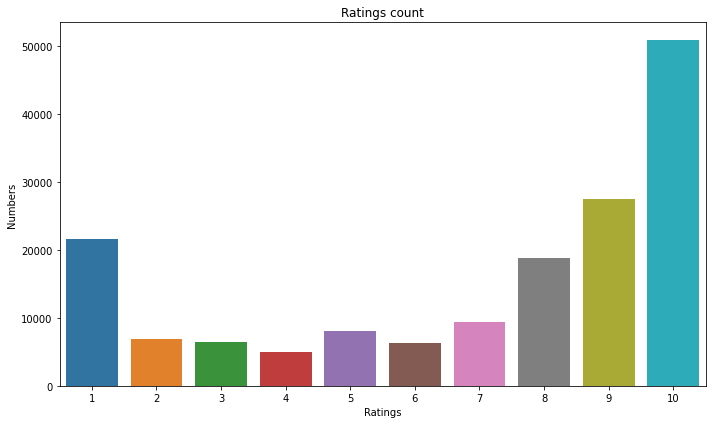

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Ratings count")
plt.xlabel("Ratings")
plt.ylabel("Numbers")
plt.xticks()

sns.barplot(train_df.rating.value_counts().index, train_df.rating.value_counts().values)
plt.tight_layout()
plt.savefig("Ratings Counts.png")

Appending drugName and condition on the review text

In [ ]:
train_df['review'] = train_df['drugName'] + " " + train_df['condition'] + " "+ train_df['review']
test_df['review'] = test_df['drugName'] + " " + test_df['condition'] + " "+ test_df['review']

DATA CLEANING

In [ ]:
import string

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import math
import sys

stop = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
punct_to_remove = string.punctuation

train_df.review = train_df.review.astype('str')
test_df.review = test_df.review.astype('str')

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Respect",
    u"_\(\._\.\)_":"Respect",
    u"<\(_ _\)>":"Respect",
    u"<m\(__\)m>":"Respect",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def basic_cleaning(abs):
    abs = re.sub('[^a-zA-Z]', ' ', abs.lower())
    abs = abs.translate(str.maketrans('', '', punct_to_remove))
    
    abs = " ".join([lemmatizer.lemmatize(word) for word in str(abs).split() if word not in stop])
    # words = nltk.word_tokenize(abs)
    return abs.replace('/n', " ")

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

train_df['review'] = train_df['review'].apply(lambda abs: convert_emoticons(abs))
train_df['review'] = train_df['review'].apply(lambda abs: remove_urls(abs))
train_df['review'] = train_df['review'].apply(lambda abs: remove_html(abs))
train_df['review'] = train_df['review'].apply(lambda abs: basic_cleaning(abs))

print("CLEANING DONE SAVING TRAINING DATA ...")
train_df.to_csv('cleaned_train.csv', index=False)
print("SAVED !!!")

test_df['review'] = test_df['review'].apply(lambda abs: convert_emoticons(abs))
test_df['review'] = test_df['review'].apply(lambda abs: remove_urls(abs))
test_df['review'] = test_df['review'].apply(lambda abs: remove_html(abs))
test_df['review'] = test_df['review'].apply(lambda abs: basic_cleaning(abs))

print("CLEANING DONE SAVING TESTING DATA ...")
train_df.to_csv('cleaned_test.csv', index=False)
print("SAVED !!!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


CLEANING DONE SAVING TRAINING DATA ...
SAVED !!!
CLEANING DONE SAVING TESTING DATA ...
SAVED !!!


In [ ]:
train_df.review.sample(5)

104364    drospirenone ethinyl estradiol premenstrual dy...
62957     depo provera abnormal uterine bleeding first t...
131121    etonogestrel birth control best birth control ...
126371    clindamycin bacterial vaginitis type person ha...
108007    livalo high cholesterol could tolerate lipitor...
Name: review, dtype: object

Removing the rare words

In [ ]:
# freq = pd.Series(' '.join(train_df['review']).split()).value_counts()
# least_freq = list(freq[freq == 1].index)
# train_df['review'] = train_df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in least_freq))
# train_df.to_csv('train_rare_removed.csv', index=False)

Polarity check

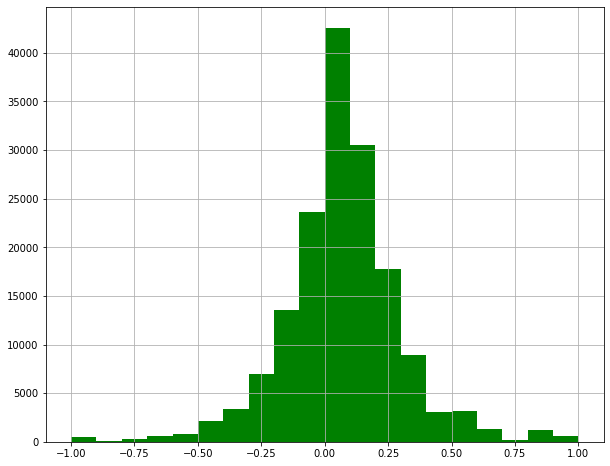

In [ ]:
from textblob import TextBlob, Word, Blobber

train_df['polarity'] = train_df['review'].map(lambda text: TextBlob(text).sentiment.polarity)
train_df['polarity'].hist(bins=20, figsize=(10, 8), color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


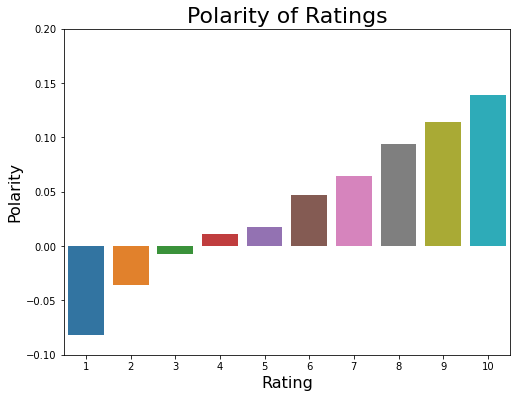

In [ ]:
mean_pol = train_df.groupby('rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(mean_pol.index, mean_pol.mean_polarity)

plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(-0.1, 0.20)
plt.show()

WordCloud

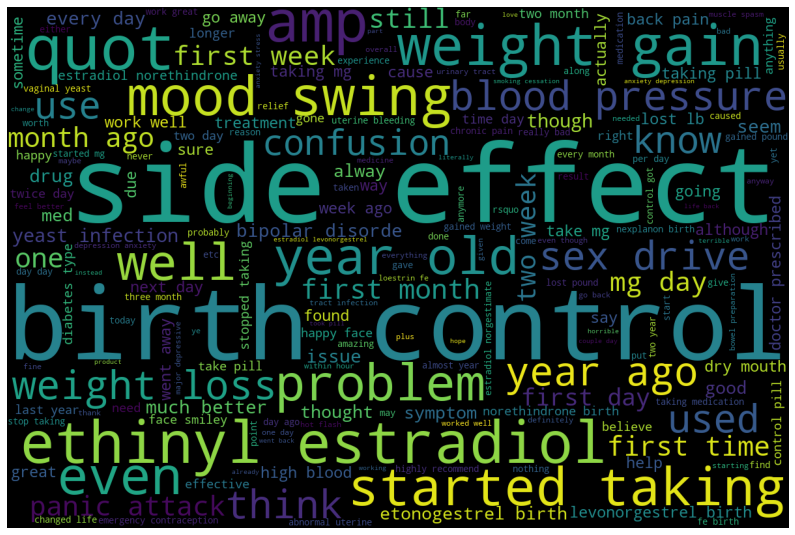

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in train_df.review)
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='black', width = 1200, height = 800).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl)
plt.axis('off')
plt.show()

Useful Count vs Rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


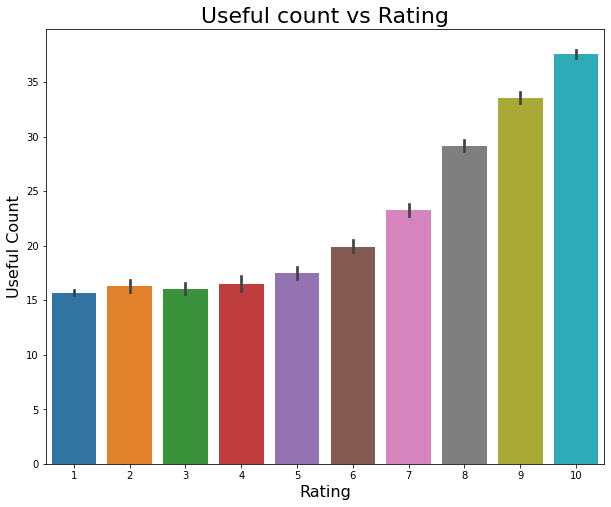

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot('rating', 'usefulCount', data=train_df)
plt.title("Useful count vs Rating", fontsize=22)
plt.ylabel("Useful Count", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.show()

Drugs with most rating of 10

Text(0.5, 1.0, 'Drugs with most rating of 10')

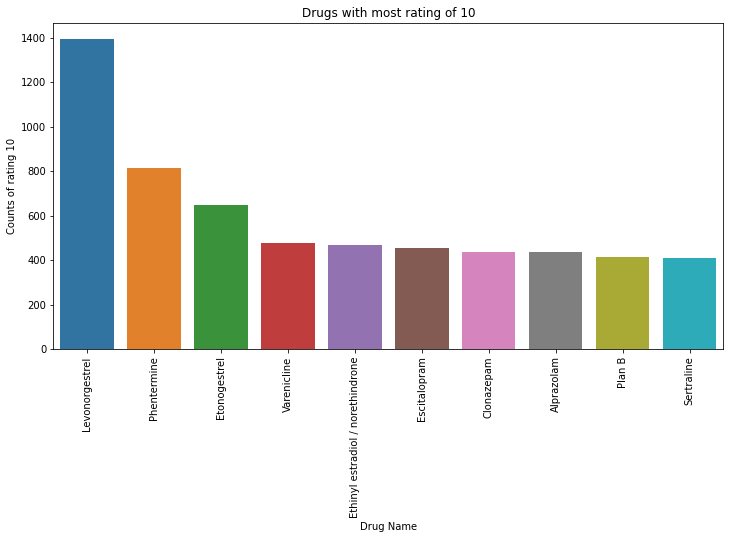

In [ ]:
best_drugs = dict(train_df.loc[train_df.rating == 10, "drugName"].value_counts())
drugname = list(best_drugs.keys())
drug_10_counts = list(best_drugs.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = drugname[0:10], y = drug_10_counts[0:10])
plt.xticks(rotation=90)
plt.xlabel('Drug Name')
plt.ylabel('Counts of rating 10')
plt.title('Drugs with most rating of 10')

Drugs with most rating of 1

Text(0.5, 1.0, 'Drugs with most rating of 1')

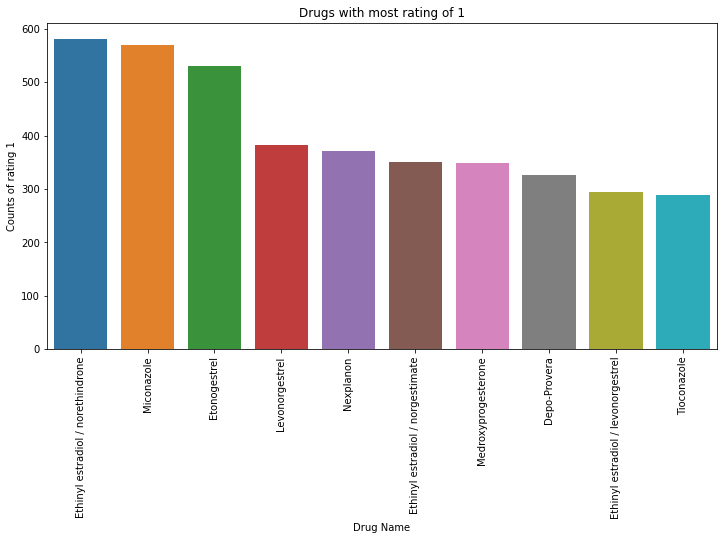

In [ ]:
worst_drugs = dict(train_df.loc[train_df.rating == 1, "drugName"].value_counts())
drugname = list(worst_drugs.keys())
drug_10_counts = list(worst_drugs.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = drugname[0:10], y = drug_10_counts[0:10])
plt.xticks(rotation=90)
plt.xlabel('Drug Name')
plt.ylabel('Counts of rating 1')
plt.title('Drugs with most rating of 1')

Pie Chart Representation of Year of Review

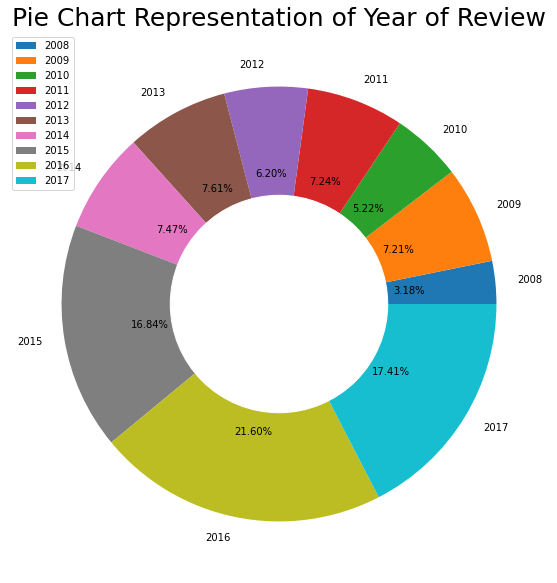

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year

values = train_df.year.value_counts().sort_index().values.tolist()
labels = train_df.year.value_counts().sort_index().index.tolist()

circle_mid = plt.Circle((0, 0), 0.5, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(values, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Year of Review', fontsize = 25)
plt.gca().add_artist(circle_mid)
plt.legend()
plt.show()

Read the cleaned data

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')

In [ ]:
# Drop NaN values if any
train_df.dropna(inplace=True)

X_train = train_df['review']
y_train = train_df['rating']
X_test = test_df['review']
y_test = test_df['rating']

# Convert ratings to only three categories i.e Positive, Neutral and Negative
def convert_rating(rating):
    if rating >= 8:
        return 2
    elif rating >=4:
        return 1
    else:
        return 0

y_test = y_test.apply(convert_rating)
y_train = y_train.apply(convert_rating)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34848, 28635, 96915]))

Data Augmentation

In [ ]:
!pip install nlpaug

import nlpaug.augmenter.word as naw
import math

def augmentation_text(aug, df: pd.DataFrame, factor_to_aug: int, labels_to_aug: list):
    augmented_sentences=[]
    augmented_sentences_labels=[]

    for idx, row in df.iterrows():
        if row[1] in labels_to_aug:
            temps = aug.augment(row[0], n=factor_to_aug)
            for sentences in temps[1:]:
                if factor_to_aug>1:
                    augmented_sentences.append(sentences)
                    augmented_sentences_labels.append(row[1])

    return augmented_sentences, augmented_sentences_labels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.1 MB/s 


/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
# Data augmentation using synonyms

max_word_aug = 30
aug = naw.SynonymAug(aug_src='wordnet',aug_max=max_word_aug)

df = train_df[['review', 'rating']]
df['rating'] = y_train # 0, 1, 2 mapped ratings

# For label 1
sent, labels = augmentation_text(aug, df, factor_to_aug=2, labels_to_aug = [1])
df_aug = pd.DataFrame({'review': sent,
                       'rating': labels})

df = pd.concat([df, df_aug])

print("1/2 augmentation done")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1/2 augmentation done


In [ ]:
y_train.value_counts()

2    96915
0    34848
1    28635
Name: rating, dtype: int64

In [ ]:
# For label 0

sent, labels = augmentation_text(aug, df, factor_to_aug=2, labels_to_aug = [0])
df_aug = pd.DataFrame({'review': sent,
                       'rating': labels})

df = pd.concat([df, df_aug])

print("2/2 augmentation done")

# 5% accuracy increased

2/2 augmentation done


In [ ]:
y_train.value_counts()

2    96915
0    34848
1    28635
Name: rating, dtype: int64

In [ ]:
import os
if 'Augmented.csv' in os.listdir():
    print('xa')

CHECKPOINT IF NOTEBOOK RESTARTS

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'Augmented.csv' not in os.listdir():
    df.to_csv('Augmented.csv', index=False)

df = pd.read_csv('/content/Augmented.csv')
X_train = df['review']
y_train = df['rating']

test_df = pd.read_csv('cleaned_test.csv')
X_test = test_df['review']
y_test = test_df['rating']

def convert_rating(rating):
    if rating >= 8:
        return 2
    elif rating >=4:
        return 1
    else:
        return 0

y_test = y_test.apply(convert_rating)

Feature Extraction

In [ ]:
# TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=200000, sublinear_tf=True, 
                        stop_words='english', dtype='float32')
#tfidf = TfidfVectorizer(min_df=5)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train.values.astype('U'))
X_test_tfidf = tfidf.transform(X_test.values.astype('U'))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  UserWarning,


Appending the usefulCount feature on the sparse matrix

In [ ]:
# from scipy.sparse import csr_matrix, hstack

# useful_train = np.array(train_df['usefulCount'].values.reshape(-1, 1))
# useful_test = np.array(test_df['usefulCount'].values.reshape(-1, 1))

# useful_sparse_train = csr_matrix(useful_train)
# useful_sparse_test = csr_matrix(useful_test)

# X_train_tfidf = hstack([X_train_tfidf, useful_sparse_train])
# X_test_tfidf = hstack([X_test_tfidf, useful_sparse_test])

Sampling

In [ ]:
# Using RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=77)
X_rus, y_rus = rus.fit_resample(X_train_tfidf, y_train)

In [ ]:
np.unique(y_rus, return_counts=True)

(array([0, 1, 2]), array([57270, 57270, 57270]))

COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train.values.astype('U'))
X_test_cv = cv.transform(X_test.values.astype('U'))

rus = RandomUnderSampler(random_state=77)
X_rus, y_rus = rus.fit_resample(X_train_cv, y_train)

Models Training

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMModel, LGBMClassifier

from sklearn.metrics import f1_score, confusion_matrix

models = [LogisticRegression(), LinearSVC(random_state=77), MultinomialNB()]

def model_train(model, X_train, y_train, X_test, y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    score = f1_score(y_pred, y_test, average='micro')

    print("*"*80)
    print(f'{model}\n')
    print("Score: ", score)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

for model in models:
    model_train(model, X_rus, y_rus, X_test_cv, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


********************************************************************************
LogisticRegression()

Score:  0.7695617401439581
Confusion Matrix: 
 [[26131  4152  4780]
 [ 4463 15845  8516]
 [ 5904  9354 82152]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


********************************************************************************
LinearSVC(random_state=77)

Score:  0.8372443380844034
Confusion Matrix: 
 [[29938  2416  2709]
 [ 3435 20452  4937]
 [ 5324  7431 84655]]
********************************************************************************
MultinomialNB()

Score:  0.7090646447237084
Confusion Matrix: 
 [[20421  3861 10781]
 [ 4059 11047 13718]
 [ 4846  9662 82902]]


Best Model

In [ ]:
mod = LinearSVC(random_state=77).fit(X_rus, y_rus)
y_pred = mod.predict(X_test_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Classwise heatmap

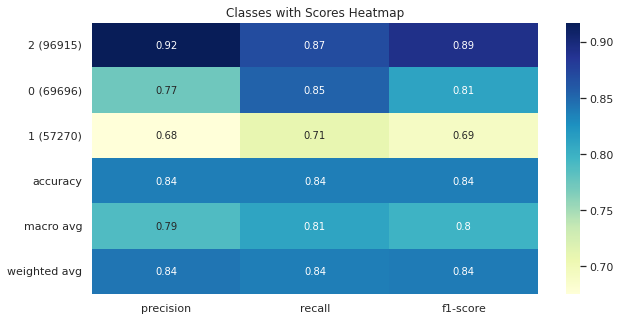

In [ ]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred, output_dict=True)

cls_df = pd.DataFrame(clf_report).iloc[:-1, :].T
acc_to_counts = [str(i) for i in y_train.value_counts().index] + ['accuracy', 'macro avg', 'weighted avg']
cls_df = cls_df.reindex(acc_to_counts)
acc_to_counts = [f"{i} ({y_train.value_counts()[i]})" for i in y_train.value_counts().index] + ['accuracy', 'macro avg', 'weighted avg']

cls_df.index = acc_to_counts

sns.set(rc = {'figure.figsize':(10, 5)})
sns.heatmap(cls_df, annot=True, annot_kws={'size': 10}, cmap="YlGnBu")
plt.title('Classes with Scores Heatmap') 
plt.savefig('Classes with Scores Heatmap.png', dpi=200, format='png', bbox_inches='tight')

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(LinearSVC(), {
    'tol': [0.01, 0.001, 0.0001],
    'C': [1, 10, 20],
    'max_iter': [500, 1000, 2000] 
}, cv=5, return_train_score=False)

clf.fit(X_rus, y_rus)
clf.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [ ]:
# # Using NearMiss

# from imblearn.under_sampling import NearMiss
# nr = NearMiss(n_jobs=-1)
# X_nr, y_nr = nr.fit_resample(X_train_tfidf, y_train)

# model = LinearSVC()
# model.fit(X_nr, y_nr)
# y_pred = model.predict(X_test_tfidf)

# score = f1_score(y_pred, y_test, average='micro')
# print(score)
# confusion_matrix(y_test, y_pred)

# WORD2VEC

In [ ]:
# # Word2Vec

# import numpy as np
# from sklearn.base import BaseEstimator, TransformerMixin
# from gensim.models import Word2Vec


# class GensimWord2VecVectorizer(BaseEstimator, TransformerMixin):
#     """
#     Word vectors are averaged across to create the document-level vectors/features.
#     gensim's own gensim.sklearn_api.W2VTransformer doesn't support out of vocabulary words,
#     hence we roll out our own.
#     All the parameters are gensim.models.Word2Vec's parameters.
#     https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
#     """

#     def __init__(self, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None,
#                  sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5,
#                  ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, null_word=0,
#                  trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False,
#                  callbacks=(), max_final_vocab=None):
#         self.size = size
#         self.alpha = alpha
#         self.window = window
#         self.min_count = min_count
#         self.max_vocab_size = max_vocab_size
#         self.sample = sample
#         self.seed = seed
#         self.workers = workers
#         self.min_alpha = min_alpha
#         self.sg = sg
#         self.hs = hs
#         self.negative = negative
#         self.ns_exponent = ns_exponent
#         self.cbow_mean = cbow_mean
#         self.hashfxn = hashfxn
#         self.iter = iter
#         self.null_word = null_word
#         self.trim_rule = trim_rule
#         self.sorted_vocab = sorted_vocab
#         self.batch_words = batch_words
#         self.compute_loss = compute_loss
#         self.callbacks = callbacks
#         self.max_final_vocab = max_final_vocab

#     def fit(self, X, y=None):
#         self.model_ = Word2Vec(
#             sentences=X, corpus_file=None,
#             size=self.size, alpha=self.alpha, window=self.window, min_count=self.min_count,
#             max_vocab_size=self.max_vocab_size, sample=self.sample, seed=self.seed,
#             workers=self.workers, min_alpha=self.min_alpha, sg=self.sg, hs=self.hs,
#             negative=self.negative, ns_exponent=self.ns_exponent, cbow_mean=self.cbow_mean,
#             hashfxn=self.hashfxn, iter=self.iter, null_word=self.null_word,
#             trim_rule=self.trim_rule, sorted_vocab=self.sorted_vocab, batch_words=self.batch_words,
#             compute_loss=self.compute_loss, callbacks=self.callbacks,
#             max_final_vocab=self.max_final_vocab)
#         return self

#     def transform(self, X):
#         X_embeddings = np.array([self._get_embedding(words) for words in X])
#         return X_embeddings

#     def _get_embedding(self, words):
#         valid_words = [word for word in words if word in self.model_.wv.vocab]
#         if valid_words:
#             embedding = np.zeros((len(valid_words), self.size), dtype=np.float32)
#             for idx, word in enumerate(valid_words):
#                 embedding[idx] = self.model_.wv[word]

#             return np.mean(embedding, axis=0)
#         else:
#             return np.zeros(self.size)

# from xgboost import XGBClassifier
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline

# gensim_word2vec_tr = GensimWord2VecVectorizer(size=50, min_count=3, sg=1, alpha=0.025, iter=10)
# gensim_word2vec_tr.fit(X_train)
# X_train_w2v = gensim_word2vec_tr.transform(X_train)
# X_test_w2v = gensim_word2vec_tr.transform(X_test)


# model = LinearSVC()
# model.fit(X_train_w2v, y_train)
# y_pred = model.predict(X_test_w2v)

# score = f1_score(y_pred, y_test, average='micro')
# print(score)
# confusion_matrix(y_test, y_pred)

# # rus = RandomUnderSampler(random_state=77)
# # X_rus, y_rus = rus.fit_resample(X_train_tfidf, y_train)

# # svc = LinearSVC()
# # w2v_svc = Pipeline([
# #     ('w2v', gensim_word2vec_tr), 
# #     ('rus', rus),
# #     ('svc', svc)
# # ])

# # import time

# # start = time.time()
# # w2v_svc.fit(X_train, y_train)
# # elapse = time.time() - start
# # print('elapsed: ', elapse)

# # from sklearn.metrics import accuracy_score, confusion_matrix

# # y_test_pred = w2v_svc.predict(X_test)
# # print('Test set accuracy %s' % accuracy_score(y_test, y_test_pred))
# # confusion_matrix(y_test, y_test_pred)